# Variables

In [1]:
DATASET_PATH = 'dataset'

# Data Preparation and Visualisation

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import os

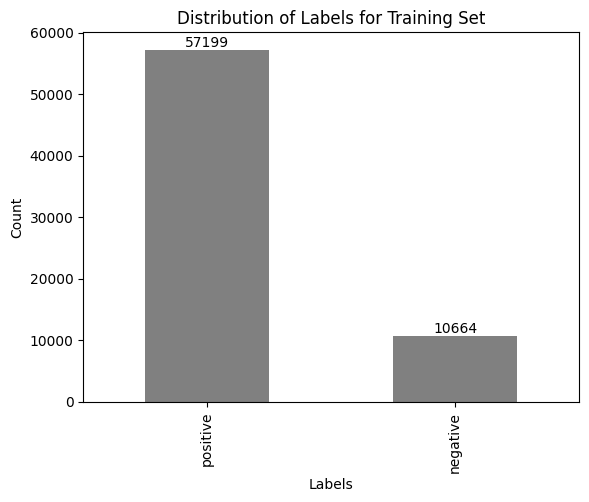

In [3]:
train_df = pd.read_csv(DATASET_PATH +'/train.txt', sep = ' ', header= None)
train_df.columns = ['patient id', 'filename', 'label', 'data source'] #col names

test_df = pd.read_csv(DATASET_PATH + '/test.txt', sep = ' ', header = None)
test_df.columns = ['patient id', 'filename', 'label', 'data source'] #col names

val_df = pd.read_csv(DATASET_PATH + '/val.txt', sep = ' ', header = None)
val_df.columns = ['patient id', 'filename', 'label', 'data source'] #col names

label_count_train = train_df['label'].value_counts() #skewed data set
label_count_test = test_df['label'].value_counts()
label_count_val = val_df['label'].value_counts()

negative  = len(train_df[train_df['label']=='negative'])
positive  = len(train_df[train_df['label']=='positive'])


label_count_train.plot(kind='bar', color = 'grey')

#Showing the number of cases of each class in the training set
for index, value in enumerate(label_count_train):
    plt.text(index, value, str(value), horizontalalignment = 'center', verticalalignment = 'bottom')
    
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels for Training Set')
plt.savefig('label_distribution_train_set.png', bbox_inches='tight')
plt.show()


In [4]:
duplicateCheck = train_df[train_df.duplicated()]
print(f'Number of duplicate rows: {len(duplicateCheck)}')

Number of duplicate rows: 0


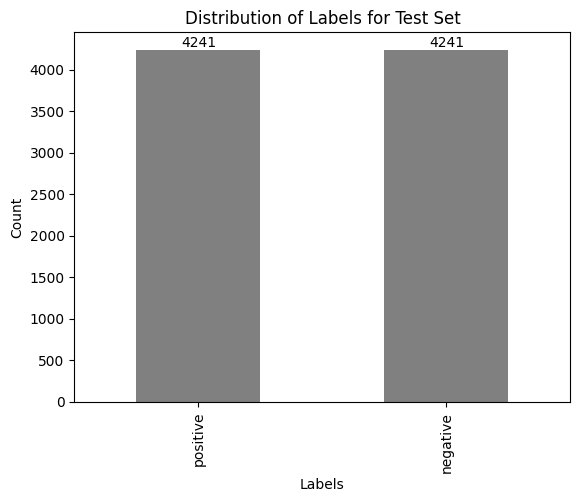

In [5]:
#Visulisation for test set
label_count_test.plot(kind='bar', color = 'grey')
for index, value in enumerate(label_count_test):
    plt.text(index, value, str(value), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels for Test Set')
plt.savefig('label_distribution_test_set.png', bbox_inches='tight')
plt.show()
    


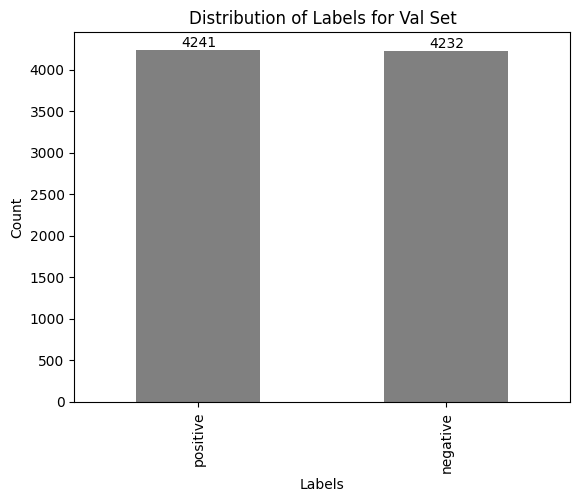

In [6]:
#Visulisation for validation set
label_count_val.plot(kind='bar', color = 'grey')
for index, value in enumerate(label_count_val):
    plt.text(index, value, str(value), horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels for Val Set')
plt.savefig('label_distribution_val_set.png', bbox_inches='tight')
plt.show()

84818
Combined data set shape: (84818, 4)


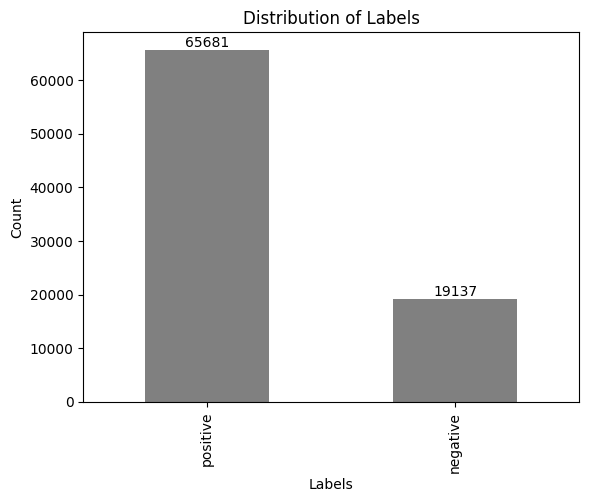

In [7]:
#Combine all data sets

combined_df = pd.concat([train_df, test_df, val_df])
print(len(combined_df))
print(f'Combined data set shape: {combined_df.shape}')
label_count_combined = combined_df['label'].value_counts()

positive = combined_df[combined_df['label']=='positive']
negative = combined_df[combined_df['label']=='negative']

combined_plot = label_count_combined.plot(kind='bar', color = 'grey')

for index, value in enumerate(label_count_combined):
    plt.text(index, value, str(value), horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.savefig('combined_label_distribution.png', bbox_inches='tight')
plt.show()




In [8]:
print((len(val_df))/len(combined_df)*100)
print((len(test_df))/len(combined_df)*100)

9.98962484378316
10.000235799004928
